In [6]:
# Load libraries
from sklearn import datasets
import matplotlib.pyplot as plt 
import numpy as np

Useful resources:
- https://medium.com/@himanshubeniwal/handwritten-digit-recognition-using-machine-learning-ad30562a9b64

### Load dataset

In [22]:
x = np.loadtxt('data.txt', skiprows=0)

In [23]:
# possible digits
digits = np.array([0,1,2,3,4,5,6,7,8,9])

In [24]:
# create target vector by repeating digits 200 times
y = np.repeat(digits, 200, axis=0)

### Normalize digits

In [25]:
print(x[1][40])

i = 0
while i < 2000:
    j = 0
    while j < 240:
        x[i][j] = x[i][j]/6
        j += 1
    i += 1
        
print(x[1][40])

6.0
1.0


In [26]:
print(x[1])

[0.         0.         0.         0.         0.         0.
 0.16666667 0.5        0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.16666667 0.         0.         0.         0.
 0.         0.16666667 0.66666667 1.         1.         1.
 1.         1.         1.         1.         0.83333333 0.
 0.         0.         0.         0.5        1.         1.
 0.83333333 0.16666667 0.16666667 0.83333333 1.         1.
 1.         1.         0.5        0.         0.33333333 1.
 1.         1.         0.66666667 0.         0.         0.
 0.5        1.         1.         1.         1.         0.5
 0.         0.5        1.         1.         1.         0.16666667
 0.         0.         0.         0.5        1.         1.
 1.         1.         0.5        0.         0.66666667 1.
 1.         0.33333333 0.         0.         0.         0.
 0.33333333 1.         1.         1.         1.         0.5
 0.         1.         1.         1.         0.         0.
 0.         0.         0.         0.16

In [27]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

In [36]:
digit = {}
i = 0
while i < 10:
    n = i * 200
    digit[i] = list(chunks(x[n], 15))
    i += 1
#x0 = list(chunks(x[0], 15))

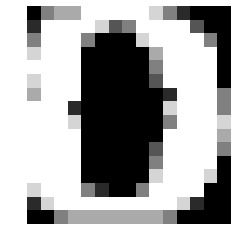

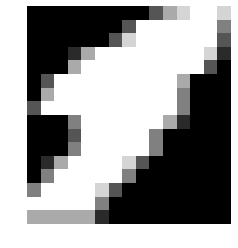

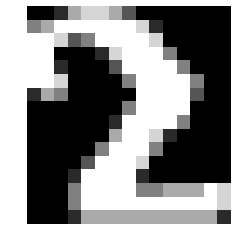

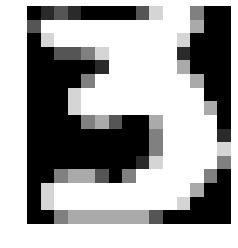

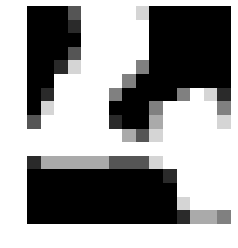

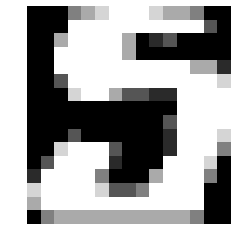

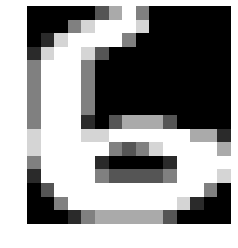

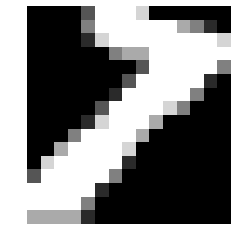

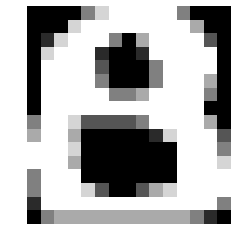

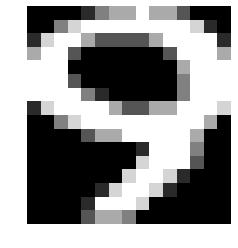

In [42]:
i = 0
while i < 10:    
    plt.imshow(digit[i], cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.show()
    i += 1

In [38]:
# split into train and test
train_x = np.concatenate([x[0:100],x[200:300],x[400:500],x[600:700],x[800:900],x[1000:1100],x[1200:1300],x[1400:1500],x[1600:1700],x[1800:1900]])
train_y = np.repeat(digits, 100, axis=0)
test_x = np.concatenate([x[100:200],x[300:400],x[500:600],x[700:800],x[900:1000],x[1100:1200],x[1300:1400],x[1500:1600],x[1700:1800],x[1900:2000]])
test_y = np.repeat(digits, 100, axis=0)

## Principal Component Analysis

Based on sklearn docs: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Plotting the total explained variance ratio with an increasing number of included PCs.

For some algorithms it might be helpful to limit the number of included PCs

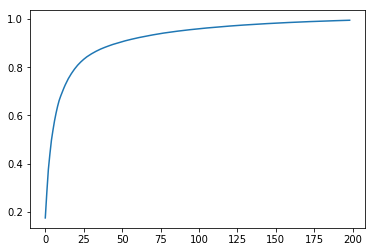

In [41]:
from sklearn.decomposition import PCA

tot_expl_var = []
for i in range(1, 200):
    tot_expl_var.append(sum(PCA(n_components=i).fit(x).explained_variance_ratio_))
    
plt.plot(tot_expl_var)

## Basic SVM Algorithm(s)

Based on SKLearn Docs: https://scikit-learn.org/stable/modules/svm.html

Polynomial seems best, all other kernels did well, but not this well. If combined with proper preprocessing, the SVM should be investigated again, I guess. Accuracy seems irritatingly high however, considering that it is just the very basic SVM algorithm that was used here.

### Polynominal Kernel w/ 3 df


In [39]:
from sklearn import svm
from sklearn.metrics import accuracy_score

svc = svm.SVC(kernel="poly", degree=3, decision_function_shape="ovo")
svc.fit(train_x, train_y)
pred_y = svc.predict(test_x)
print(pred_y)

accuracy_score(test_y, pred_y)

C:\Users\nikla\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0 0 0 0 0 0 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 5 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 4 1 1 1
 1 7 1 1 1 1 1 1 4 1 1 1 1 1 7 1 4 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 7 1 1 7
 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1 4 1 1 1 1 9 1 1 1 1 1 1 1 1 4 1 1 1 1 1
 1 1 1 1 1 9 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 7 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 7 2 2 2 2 9 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 7 4 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 7 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

0.937

### Linear Kernel


In [40]:
svc = svm.SVC(kernel="linear", decision_function_shape="ovo")
svc.fit(train_x, train_y)
pred_y = svc.predict(test_x)
print(pred_y)

accuracy_score(test_y, pred_y)

[0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 4 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 7 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 3 3 3 3 3 3 3
 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4
 4 4 4 4 4 4 4 1 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

0.964